In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols # for on-way anova
from statsmodels.stats.anova import _get_covariance,anova_lm # for n-way anova
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Swetha/Downloads/SalaryData.csv')

In [3]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
df.Education = pd.Categorical(df.Education)
df.Education.value_counts

<bound method IndexOpsMixin.value_counts of 0      Doctorate
1      Doctorate
2      Doctorate
3      Doctorate
4      Doctorate
5      Doctorate
6      Doctorate
7      Doctorate
8      Doctorate
9      Doctorate
10     Doctorate
11     Doctorate
12     Doctorate
13     Doctorate
14     Doctorate
15     Bachelors
16     Bachelors
17     Bachelors
18     Bachelors
19     Bachelors
20     Bachelors
21     Bachelors
22     Bachelors
23     Bachelors
24     Bachelors
25     Bachelors
26       HS-grad
27       HS-grad
28       HS-grad
29       HS-grad
30       HS-grad
31       HS-grad
32       HS-grad
33       HS-grad
34       HS-grad
35     Bachelors
36     Bachelors
37     Bachelors
38     Bachelors
39     Doctorate
Name: Education, dtype: category
Categories (3, object): [' Bachelors', ' Doctorate', ' HS-grad']>

In [7]:
df.Occupation = pd.Categorical(df.Occupation)
df.Occupation.value_counts

<bound method IndexOpsMixin.value_counts of 0         Adm-clerical
1         Adm-clerical
2         Adm-clerical
3         Adm-clerical
4                Sales
5                Sales
6                Sales
7                Sales
8                Sales
9       Prof-specialty
10      Prof-specialty
11      Prof-specialty
12      Prof-specialty
13      Prof-specialty
14      Prof-specialty
15        Adm-clerical
16        Adm-clerical
17        Adm-clerical
18      Prof-specialty
19      Prof-specialty
20      Prof-specialty
21      Prof-specialty
22               Sales
23               Sales
24               Sales
25               Sales
26               Sales
27               Sales
28               Sales
29        Adm-clerical
30        Adm-clerical
31        Adm-clerical
32      Prof-specialty
33      Prof-specialty
34      Prof-specialty
35     Exec-managerial
36     Exec-managerial
37     Exec-managerial
38     Exec-managerial
39     Exec-managerial
Name: Occupation, dtype: category
Ca

##### 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [12]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


###### The above is the ANOVA table for Education variable.
Since the p value = 1.257709e-08 is less than the significance level (alpha = 0.05), we can reject the null hypothesis and conclude that there is a significant difference in the mean salaries for at least one category of education.

##### 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results

In [14]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


###### The above is the ANOVA table for Occupation variable.
Since the p value = 0.458508 is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis (i.e. we accept H0) and conclude that there is no significant difference in the mean salaries across the 4 categories of occupation.

##### 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

###### To find out which class means are significantly different, the Tukey Honest Significant Difference test is performed.
Using, the Tukey Honest Significant Difference test, we get the following table for the category education:

In [17]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

In [21]:
MultiComp=MultiComparison(df['Salary'], df['Education'])
print(MultiComp.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


###### The table shows that since the p- values(p-adj in the table) are lesser than the significance level for all the three categories of education, this implies that the mean salaries across all categories of education are different.

In [22]:
MultiComp=MultiComparison(df['Salary'], df['Occupation'])
print(MultiComp.tukeyhsd().summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


###### For the category occupation, the Tukey Honest Significant Difference test has further confirmed that the mean salaries across all occupation classes are significantly same. The table below confirms the same, wherein we see that all p-values are greater than 0.05.

#### 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

###### We analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

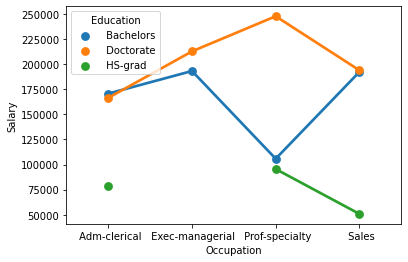

In [26]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

###### The interaction plot shows that there is significant amount of interaction between the categorical variables, Education and Occupation.
The following are some of the observations from the interaction plot:
· People with HS-grad education do not reach the position of Exec-managerial and they hold only Adm-clerk, Sales and Prof-Specialty occupations.
· People with education as Bachelors or Doctorate and occupation as Adm-clerical and Sales almost earn the same salaries(salaries ranging from 170000–190000).
· People with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupations as Adm-clerical and Sales.
· People with education as Bachelors and occupation Sales earn higher than people with education as Bachelors and occupation Prof-Specialty whereas people with education as Doctorate and occupation Sales earn lesser than people with Doctorate and occupation Prof-Specialty. We see a reversal in this part of the plot.
· Similarly, people with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupation Exec-Managerial whereas people with education as Doctorate and occupation as Prof-Specialty earn higher than people with education as Doctorate and occupation Exec-Managerial. There is a reversal in this part of the plot too.
· Salespeople with Bachelors or Doctorate education earn the same salaries and earn higher than people with education as HS-grad.
· Adm clerical people with education as HS-grad earn the lowest salaries when compared to people with education as Bachelors or Doctorate.
· Prof-Specialty people with education as Doctorate earn maximum salaries and people with education as HS-Grad earn the minimum.
· People with education as HS -Grad earn the minimum salaries.
· There are no people with education as HS -grad who hold Exec-managerial occupation.
· People with education as Bachelors and occupation, Sales and Exec-Managerial earn the same salaries.

#### 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

###### 𝐻0: The effect of the independent variable ‘education’ on the mean ‘salary’ does not depend on the effect of the other independent variable ‘occupation’ (i. e. there is no interaction effect between the 2 independent variables, education and occupation).
𝐻1: There is an interaction effect between the independent variable ‘education’ and the independent variable ‘occupation’ on the mean Salary.
By performing two way ANOVA, we get the following table:

In [31]:
from statsmodels.stats.anova import _get_covariance,anova_lm # for n-way anova

In [32]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


In [33]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model,type=2)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


###### From the table, we see that there is a significant amount of interaction between the variables, Education and Occupation.
As p value = 2.232500e-05 is lesser than the significance level (alpha = 0.05), we reject the null hypothesis.
Thus, we see that there is an interaction effect between education and occupation on the mean salary.
From the ANOVA method and the interaction plot, we see that education combined with occupation results in higher and better salaries among the people. It is clearly seen that people with education as Doctorate draw the maximum salaries and people with education HS-grad earn the least. Thus, we can conclude that Salary is dependent on educational qualifications and occupation.